# Upload Data Sets (Tech_Hub)

## Data Sets

In [ ]:
import pandas as pd

# Load the Excel files into Pandas DataFrames
df1 = pd.read_excel("Metropolitan_Data_on_Tech.xlsx")
df1.rename(columns={'Employment Employment_percent_relative_standard_error Hourly_mean_wage Annual_mean_wage Wage_percent_relative_standard_error Hourly_10th_percentile_wage Hourly_25th_percentile_wage Hourly_median_wage Hourly_75th_percentile_wage Hourly_90th_percentile_wage Annual_10th_percentile_wage_(2) Annual_25th_percentile_wage_(2) Annual_median_wage_(2) Annual_75th_percentile_wage_(2) Annual_90th_percentile_wage_(2) Employment_per_1,000_jobs Location_Quotient': 'Employment_Total'}, inplace=True)
df1.rename(columns={'Employment_per_Thousand_Jobs': 'Employment_per_1k_jobs'}, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 18 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Area_Name                                   538 non-null    object
 1   Employment_Total                            530 non-null    object
 2   Employment_percent_relative_standard_error  530 non-null    object
 3   Hourly_mean_wage                            530 non-null    object
 4   Annual_mean_wage                            530 non-null    object
 5   Wage_percent_relative_standard_error        530 non-null    object
 6   Hourly_10th_percentile_wage                 530 non-null    object
 7   Hourly_25th_percentile_wage                 530 non-null    object
 8   Hourly_median_wage                          530 non-null    object
 9   Hourly_75th_percentile_wage                 530 non-null    object
 10  Hourly_90th_percentile_wag

In [1154]:
import pandas as pd

# Load the Excel files into Pandas DataFrames
df2 = pd.read_excel("Tech_Job_Gains.xlsx")

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   City    51 non-null     object
 1   2018    51 non-null     int64 
 2   2019    51 non-null     int64 
 3   2020    51 non-null     int64 
 4   2021    51 non-null     int64 
 5   2022    51 non-null     int64 
 6   2023    51 non-null     int64 
 7   2024    51 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 3.3+ KB


In [1155]:
import pandas as pd

# Load the Excel files into Pandas DataFrames
df3 = pd.read_excel("Venture_Capitol.xlsx")

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               150 non-null    object 
 1   Venture_Capital_Score  150 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [1156]:
import pandas as pd

# Load the Excel files into Pandas DataFrames
df11 = pd.read_csv("top_100_us_tech_cities.csv")

df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Spot                   108 non-null    object
 1   Number_of_Tech_Events  108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [1157]:
import pandas as pd

# Load the Excel files into Pandas DataFrames
df12 = pd.read_csv("top_100_us_tech_layoffs_per_capita.csv")

df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Location            105 non-null    object 
 1   Population          105 non-null    int64  
 2   Number_of_Layoffs   105 non-null    int64  
 3   Layoffs_per_Capita  105 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.4+ KB


## Merging the Data Sets

In [1158]:
import pandas as pd
import sqlite3

# Load the Excel files into Pandas DataFrames
df1 = pd.read_excel("Metropolitan_Data_on_Tech.xlsx")
df2 = pd.read_excel("Tech_Job_Gains.xlsx")
df11 = pd.read_csv("top_100_us_tech_cities.csv")
df12 = pd.read_csv("top_100_us_tech_layoffs_per_capita.csv")



# Adjust specific city names to match between datasets
df2['City'] = df2['City'].replace('New York City', 'New York')
df1['Area_Name'] = df1['Area_Name'].replace('Washington-Arlington-Alexandria, DC-VA-MD-WV (00-47900)', 
                                            'Washington DC-Arlington-Alexandria, DC-VA-MD-WV (00-47900)')

# Create an in-memory SQLite database
conn = sqlite3.connect(":memory:")

# Load DataFrames into SQLite tables
df1.to_sql("Metro_Data", conn, if_exists="replace", index=False)
df2.to_sql("Tech_Gains", conn, if_exists="replace", index=False)
df11.to_sql("Tech_Events", conn, if_exists="replace", index=False)
df12.to_sql("Tech_Layoffs", conn, if_exists="replace", index=False)


# SQL Query to merge all datasets
query = """
SELECT DISTINCT *
FROM Metro_Data 
JOIN Tech_Gains ON Metro_Data.Area_Name LIKE '%' || Tech_Gains.City || '%'
AND Metro_Data.Area_Name NOT LIKE '%nonmetropolitan%'
LEFT JOIN Tech_Layoffs ON Tech_Layoffs.Location LIKE '%' || Tech_Gains.City || '%'
LEFT JOIN Tech_Events ON Tech_Events.Spot LIKE '%' || Tech_Gains.City || '%'
GROUP BY Metro_Data.Area_Name

"""

# Load the merged result back into a Pandas DataFrame
merged_df = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Save or analyze the merged data
merged_df.to_excel("merged_output.xlsx", index=False)  # Save as Excel
merged_df  # Display first few rows



,Area_Name,"Employment Employment_percent_relative_standard_error Hourly_mean_wage Annual_mean_wage Wage_percent_relative_standard_error Hourly_10th_percentile_wage Hourly_25th_percentile_wage Hourly_median_wage Hourly_75th_percentile_wage Hourly_90th_percentile_wage Annual_10th_percentile_wage_(2) Annual_25th_percentile_wage_(2) Annual_median_wage_(2) Annual_75th_percentile_wage_(2) Annual_90th_percentile_wage_(2) Employment_per_1,000_jobs Location_Quotient",Employment_percent_relative_standard_error,Hourly_mean_wage,Annual_mean_wage,Wage_percent_relative_standard_error,Hourly_10th_percentile_wage,Hourly_25th_percentile_wage,Hourly_median_wage,Hourly_75th_percentile_wage,...,2021,2022,2023,2024,Location,Population,Number_of_Layoffs,Layoffs_per_Capita,Spot,Number_of_Tech_Events
0,"Albuquerque, NM (00-10740)",11730,3.29999995231628,46.7,97140,2.40000009536743,20.9,30.12,42.53,61.91,...,21778,22898,23276,23596,"Albuquerque, NM",561188.0,3464.0,0.006173,"Albuquerque, NM",98
1,"Atlanta-Sandy Springs-Roswell, GA (00-12060)",120180,1.5,52.5,109210,0.699999988079071,26.05,36.34,50.12,65.4,...,217589,227821,229584,235268,"Atlanta, GA",5234502.0,15838.0,0.003026,"Atlanta, GA",2937
2,"Austin-Round Rock, TX (00-12420)",81150,1.39999997615814,53.6,111490,2.59999990463257,24.43,35.07,50.64,67.85,...,157572,176248,180507,190186,"Austin, TX",4391747.0,1353.0,0.000308,"Austin, TX",996
3,"Baltimore-Columbia-Towson, MD (00-12580)",64180,1.79999995231628,61.76,128450,3.40000009536743,30.93,42.44,60.23,77.72,...,104078,104423,104838,106852,"Baltimore, MD",5370385.0,5677.0,0.001057,"Baltimore, MD",1857
4,"Boise City, ID (00-14260)",10580,2.70000004768372,53.76,111810,7.80000019073486,22.64,30.15,41.56,60.36,...,24048,25387,25749,26592,"Boise, ID",7963697.0,17464.0,0.002193,"Boise, ID",951
5,"Boston-Cambridge-Nashua, MA-NH (00-71650)",136640,1.29999995231628,61.92,128790,0.899999976158142,33.19,43.83,60.66,77.69,...,266780,270775,268934,274023,"Boston, MA",736976.0,17458.0,0.023689,"Boston, MA",1312
6,"Buffalo-Cheektowaga-Niagara Falls, NY (00-15380)",11770,1.39999997615814,46.88,97510,0.800000011920929,23.48,31.71,43.26,59,...,22815,23981,24550,25255,"Buffalo, NY",8566999.0,1581.0,0.000185,"Buffalo, NY",1731
7,"Charleston, WV (00-16620)",2540,4,36.92,76790,1.70000004768372,19.45,24.23,32.45,45.94,...,17759,19162,19588,20468,"Charleston, SC",2033509.0,13275.0,0.006528,"Charleston, SC",435
8,"Charleston-North Charleston, SC (00-16700)",11770,2.79999995231628,49.1,102120,1.29999995231628,24.33,33.72,46.41,60.59,...,17759,19162,19588,20468,"Charleston, SC",2033509.0,13275.0,0.006528,"Charleston, SC",435
9,"Charlotte-Concord-Gastonia, NC-SC (00-16740)",60370,0.899999976158142,55.78,116020,0.5,28.47,39.38,55.06,68.69,...,85263,89246,90859,93806,"Charlotte, NC",6374167.0,15702.0,0.002463,"Charlotte, NC",2241


### 1. Add ***Tech Job Growth Column*** & ***Entry Level Wage Average (10th and 25th Percentile)***

In [1159]:
import pandas as pd
Merged_Output = pd.read_excel("merged_output.xlsx")
Merged_Output.rename(columns={'Employment Employment_percent_relative_standard_error Hourly_mean_wage Annual_mean_wage Wage_percent_relative_standard_error Hourly_10th_percentile_wage Hourly_25th_percentile_wage Hourly_median_wage Hourly_75th_percentile_wage Hourly_90th_percentile_wage Annual_10th_percentile_wage_(2) Annual_25th_percentile_wage_(2) Annual_median_wage_(2) Annual_75th_percentile_wage_(2) Annual_90th_percentile_wage_(2) Employment_per_1,000_jobs Location_Quotient': 'Employment_Total'}, inplace=True)
Merged_Output.rename(columns={'Employment_per_Thousand_Jobs': 'Employment_per_1k_jobs'}, inplace=True)



final_value = Merged_Output['2023']
intial_value = Merged_Output['2018']
years = 6

Merged_Output['Average_7_Year_Growth_Rate'] = (((final_value / intial_value) ** (1 / years) - 1) * 100).round(3)
Merged_Output['Entry_Level_Tech_Wage'] = (Merged_Output['Annual_10th_percentile_wage'] + Merged_Output['Annual_25th_percentile_wage'])/2

# Optionally, you can save the result to a new Excel file
Merged_Output.to_excel("updated_output.xlsx", index=False)

df4 = pd.read_excel('updated_output.xlsx')
df4


,Area_Name,Employment_Total,Employment_percent_relative_standard_error,Hourly_mean_wage,Annual_mean_wage,Wage_percent_relative_standard_error,Hourly_10th_percentile_wage,Hourly_25th_percentile_wage,Hourly_median_wage,Hourly_75th_percentile_wage,...,2023,2024,Location,Population,Number_of_Layoffs,Layoffs_per_Capita,Spot,Number_of_Tech_Events,Average_7_Year_Growth_Rate,Entry_Level_Tech_Wage
0,"Albuquerque, NM (00-10740)",11730,3.3,46.70,97140,2.4,20.90,30.12,42.53,61.91,...,23276,23596,"Albuquerque, NM",561188.0,3464.0,0.006173,"Albuquerque, NM",98,2.111,53065
1,"Atlanta-Sandy Springs-Roswell, GA (00-12060)",120180,1.5,52.50,109210,0.7,26.05,36.34,50.12,65.40,...,229584,235268,"Atlanta, GA",5234502.0,15838.0,0.003026,"Atlanta, GA",2937,1.500,64890
2,"Austin-Round Rock, TX (00-12420)",81150,1.4,53.60,111490,2.6,24.43,35.07,50.64,67.85,...,180507,190186,"Austin, TX",4391747.0,1353.0,0.000308,"Austin, TX",996,4.914,61875
3,"Baltimore-Columbia-Towson, MD (00-12580)",64180,1.8,61.76,128450,3.4,30.93,42.44,60.23,77.72,...,104838,106852,"Baltimore, MD",5370385.0,5677.0,0.001057,"Baltimore, MD",1857,0.653,76300
4,"Boise City, ID (00-14260)",10580,2.7,53.76,111810,7.8,22.64,30.15,41.56,60.36,...,25749,26592,"Boise, ID",7963697.0,17464.0,0.002193,"Boise, ID",951,1.619,54905
5,"Boston-Cambridge-Nashua, MA-NH (00-71650)",136640,1.3,61.92,128790,0.9,33.19,43.83,60.66,77.69,...,268934,274023,"Boston, MA",736976.0,17458.0,0.023689,"Boston, MA",1312,0.426,80095
6,"Buffalo-Cheektowaga-Niagara Falls, NY (00-15380)",11770,1.4,46.88,97510,0.8,23.48,31.71,43.26,59.00,...,24550,25255,"Buffalo, NY",8566999.0,1581.0,0.000185,"Buffalo, NY",1731,0.236,57395
7,"Charleston, WV (00-16620)",2540,4.0,36.92,76790,1.7,19.45,24.23,32.45,45.94,...,19588,20468,"Charleston, SC",2033509.0,13275.0,0.006528,"Charleston, SC",435,1.748,45425
8,"Charleston-North Charleston, SC (00-16700)",11770,2.8,49.10,102120,1.3,24.33,33.72,46.41,60.59,...,19588,20468,"Charleston, SC",2033509.0,13275.0,0.006528,"Charleston, SC",435,1.748,60380
9,"Charlotte-Concord-Gastonia, NC-SC (00-16740)",60370,0.9,55.78,116020,0.5,28.47,39.38,55.06,68.69,...,90859,93806,"Charlotte, NC",6374167.0,15702.0,0.002463,"Charlotte, NC",2241,2.272,70565


### Final Clean

In [1160]:
import pandas as pd

# Load the initial data from the Excel file
df5 = pd.read_excel("updated_output.xlsx")

# Drop unnecessary columns from df5 as per your previous step

# Define the weights for each column in the calculation of the "Entry Level Tech Friendly Index"
weights = {
    'Employment_per_1k_jobs': 0.25,
    'Location_Quotient': 0.20,
    'Average_7_Year_Growth_Rate': 0.30,
    'Entry_Level_Tech_Wage': 0.15,
    'Number_of_Tech_Events': 0.10,
    'Layoffs_per_Capita': 0.10
}

# Calculate the "Entry Level Tech Friendly Index" by combining the weighted columns
df5['Tech_Friendly_Index'] = (
    df5['Employment_per_1k_jobs'] * weights['Employment_per_1k_jobs'] +
    df5['Location_Quotient'] * weights['Location_Quotient'] +
    df5['Average_7_Year_Growth_Rate'] * weights['Average_7_Year_Growth_Rate'] +
    df5['Entry_Level_Tech_Wage'] * weights['Entry_Level_Tech_Wage'] +
    df5['Number_of_Tech_Events'] * weights['Number_of_Tech_Events'] -
    df5['Layoffs_per_Capita'] * weights['Layoffs_per_Capita']


)

# Save the updated DataFrame with the new index back to an Excel file
df5.to_excel("Tech_Hub.xlsx", index=False)

# Optional: Print the updated DataFrame to check the new column
df5= pd.read_excel("Tech_Hub.xlsx")
df5.info(40)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Area_Name                                   56 non-null     object 
 1   Employment_Total                            56 non-null     int64  
 2   Employment_percent_relative_standard_error  56 non-null     float64
 3   Hourly_mean_wage                            56 non-null     float64
 4   Annual_mean_wage                            56 non-null     int64  
 5   Wage_percent_relative_standard_error        56 non-null     float64
 6   Hourly_10th_percentile_wage                 56 non-null     float64
 7   Hourly_25th_percentile_wage                 56 non-null     float64
 8   Hourly_median_wage                          56 non-null     float64
 9   Hourly_75th_percentile_wage                 56 non-null     float64
 10  Hourly_90th_perc

### Calculate "Tech Friendly Index"

# Confortable Living Index

In [1161]:
import pandas as pd 

Entry_Level_Wage= pd.read_excel("Final_Tech_Data.xlsx")
Entry_Level_Wage.drop(['Employment_Total', 'Employment_per_1k_jobs', 'Location_Quotient', 'Average_7_Year_Growth_Rate'], axis=1, inplace=True)
Entry_Level_Wage.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Area_Name              56 non-null     object
 1   Entry_Level_Tech_Wage  56 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ KB


In [1162]:
import pandas as pd

COL = pd.read_csv("advisorsmith_cost_of_living_index.csv")
COL

,City,State,Cost of Living Index
0,Abilene,TX,89.1
1,Adrian,MI,90.5
2,Akron,OH,89.4
3,Alamogordo,NM,85.8
4,Albany,GA,87.3
...,...,...,...
505,Wheeling,WV,84.1
506,New London,CT,105.9
507,Daphne,AL,96.6
508,Victoria,TX,89.5


In [1163]:
import pandas as pd

TB = pd.read_excel("Tax_Burden.xlsx")
TB.head()

,State,Sales_Tax,Income_Tax,Property_Tax,License_Tax,Total_Tax
0,AL,4936,3870.0,337.0,494,9637.0
1,AK,256,228.0,128.0,147,759.0
2,AZ,8246,4452.0,883.0,459,14040.0
3,AR,4410,3141.0,1088.0,384,9023.0
4,CA,52347,86937.0,2316.0,9422,151022.0


### Calculating Financial Hub

In [1164]:
import pandas as pd
import sqlite3

# Load the datasets
Entry_Level_Wage = pd.read_excel("Final_Tech_Data.xlsx")
COL = pd.read_csv("advisorsmith_cost_of_living_index.csv")
TB = pd.read_excel("Tax_Burden.xlsx")

# Drop unnecessary columns from Entry_Level_Wage
Entry_Level_Wage.drop(['Employment_Total', 'Employment_per_1k_jobs', 'Location_Quotient', 'Average_7_Year_Growth_Rate'], axis=1, inplace=True)

# Standardize column names for easier SQL usage
COL.rename(columns={"Cost of Living Index": "Cost_Living"}, inplace=True)

# Create an in-memory SQLite database
conn = sqlite3.connect(":memory:")

# Load the DataFrames into SQLite
Entry_Level_Wage.to_sql("Tech_Wages", conn, if_exists="replace", index=False)
COL.to_sql("Cost_Living", conn, if_exists="replace", index=False)
TB.to_sql("Tax_Burden", conn, if_exists="replace", index=False)


# SQL query to calculate the ratios
query = """
SELECT Tech_Wages.Area_Name, Tax_Burden.State, Tax_Burden.Total_Tax, Cost_Living.Cost_Living,
(Cost_Living.Cost_Living * 100) + Tax_Burden.Total_Tax 
AS Financial_Comfort_Index
FROM Tech_Wages
JOIN Cost_Living ON Tech_Wages.Area_Name LIKE '%' || Cost_Living.City || '%'
JOIN Tax_Burden ON Tech_Wages.Area_Name LIKE '%, %' || Tax_Burden.State || '%'
GROUP BY Tech_Wages.Area_Name;

"""

# Execute query and store the result in a DataFrame
result_df = pd.read_sql(query, conn)

# Close the SQLite connection
conn.close()

# Display results
result_df.head()

# Optionally, save the result to an Excel file
result_df.to_excel("Financial_Hub.xlsx", index=False)
result_df

,Area_Name,State,Total_Tax,Cost_Living,Financial_Comfort_Index
0,"Albuquerque, NM (00-10740)",NM,5008.00,92.9,14298.00
1,"Atlanta-Sandy Springs-Roswell, GA (00-12060)",GA,19723.00,100.3,29753.00
2,"Austin-Round Rock, TX (00-12420)",TX,51081.00,106.6,61741.00
3,"Baltimore-Columbia-Towson, MD (00-12580)",MD,19238.00,107.0,29938.00
4,"Boise City, ID (00-14260)",ID,3969.00,100.3,13999.00
5,"Boston-Cambridge-Nashua, MA-NH (00-71650)",MA,26211.00,132.6,39471.00
6,"Buffalo-Cheektowaga-Niagara Falls, NY (00-15380)",NY,74532.00,97.3,84262.00
7,"Charleston, WV (00-16620)",WV,4886.00,83.9,13276.00
8,"Charleston-North Charleston, SC (00-16700)",SC,9561.00,83.9,17951.00
9,"Charlotte-Concord-Gastonia, NC-SC (00-16740)",NC,24994.00,97.9,34784.00


## Combine Both

In [1165]:
import pandas as pd
import sqlite3

# Load the datasets
TH = pd.read_excel("Tech_Hub.xlsx")
FH = pd.read_excel("Financial_Hub.xlsx")

# Drop unnecessary columns from Entry_Level_Wage




# Create an in-memory SQLite database
conn = sqlite3.connect(":memory:")

# Load the DataFrames into SQLite
Entry_Level_Wage.to_sql("Tech_Wages", conn, if_exists="replace", index=False)
TH.to_sql("Tech_Hub", conn, if_exists="replace", index=False)
FH.to_sql("Financial_Hub", conn, if_exists="replace", index=False)


# SQL query to calculate the ratios
query = """
SELECT Tech_Hub.Area_Name, Tech_Hub.Tech_Friendly_Index, Financial_Hub.Financial_Comfort_Index 
FROM Tech_Hub
JOIN Financial_Hub ON Tech_Hub.Area_Name LIKE '%' || Financial_Hub.Area_Name || '%'

GROUP BY Tech_Hub.Area_Name;

"""

# Execute query and store the result in a DataFrame
result_df = pd.read_sql(query, conn)

# Close the SQLite connection
conn.close()

# Display results
result_df.head()

# Optionally, save the result to an Excel file
result_df.to_excel("Final_Data.xlsx", index=False)
print(result_df.describe())

       Tech_Friendly_Index  Financial_Comfort_Index
count            55.000000                56.000000
mean           9806.800001             43224.752500
std            1941.960600             41507.675849
min            6669.265783             13276.000000
25%            8627.053394             18458.000000
50%            9355.843698             29811.000000
75%           10725.801392             44170.517500
max           18477.503264            168882.000000


---

# Machine Learning Begins


### 1. Loading Data Sets & Defining Targets

In [1166]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


# Step 1: Load data
df = pd.read_csv('Final_Data.csv')

# Step 2: Preprocess data (you can adjust as needed)
# Handling missing values, if any (for simplicity, let's drop rows with missing values)
df = df.dropna(subset=['Financial_Comfort_Index', 'Tech_Friendly_Index'])

# Step 3: Define the thresholds (example thresholds, adjust as needed)
tech_threshold = 20  # New threshold for Tech-Friendliness
finance_threshold = 50  # New threshold for Financial Comfort


# Step 4: Classify Tech Hub and Affordable columns based on thresholds
df['Tech Hub?'] = df['Tech_Friendly_Index'].apply(lambda x: 1 if x > tech_threshold else 0)
df['Affordable?'] = df['Financial_Comfort_Index'].apply(lambda x: 1 if x > finance_threshold else 0)

# Step 5: Define the Final Classification based on the combination of Tech Hub and Affordable
def final_classification(row):
    if row['Tech Hub?'] == 1 and row['Affordable?'] == 1:
        return "High-Tech, Cost-Effective"
    elif row['Tech Hub?'] == 1 and row['Affordable?'] == 0:
        return "High-Tech, Expensive"
    elif row['Tech Hub?'] == 0 and row['Affordable?'] == 1:
        return "Low-Tech, Cost-Effective"
    elif row['Tech Hub?'] == 0 and row['Affordable?'] == 0:
        return "Low-Tech, Expensive"

df['Final Classification'] = df.apply(final_classification, axis=1)

# Step 6: Filter out "Not Suitable" results
df = df[df['Final Classification'] != 'Low-Tech, Expensive']

# Step 7: Check the distribution of the final classification again
print("Final Classification Distribution:")
print(df['Final Classification'].value_counts())

# Step 8: Ensure there are at least two classes for classification
if len(df['Final Classification'].value_counts()) < 2:
    print("Error: Not enough classes in the target variable for classification.")
else:
    # Encode the 'Final Classification' for machine learning models
    label_encoder = LabelEncoder()
    df['Final Classification Encoded'] = label_encoder.fit_transform(df['Final Classification'])

    # Prepare features and target variables
    X = df[['Tech_Friendly_Index', 'Financial_Comfort_Index']]  # Features
    y = df['Final Classification Encoded']  # Target


Final Classification Distribution:
High-Tech, Cost-Effective    26
Low-Tech, Cost-Effective     16
High-Tech, Expensive          9
Name: Final Classification, dtype: int64


### 2. Split data into training and testing sets

In [1167]:
# Step 8: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## ***1. LOGISTIC REGRESSION***

In [1168]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.metrics import roc_auc_score

# Get probability estimates instead of discrete class predictions


# Compute ROC-AUC score (ensure correct multi-class handling)


# Logistic Regression Model with L2 Regularization (default)
log_reg = LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear', C=1.8)  # C=1.0 is the default value

log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_proba_log = log_reg.predict_proba(X_test)
# Print classification report for Logistic Regression
print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred_log_reg, average='weighted')}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_log, multi_class='ovr', average='weighted')}")

print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred_log_reg)}\n")


Logistic Regression Evaluation:
Accuracy: 0.8181818181818182
Precision: 0.890909090909091
Recall: 0.8181818181818182
F1 Score: 0.8106060606060606
ROC-AUC: 1.0
Confusion Matrix: 
[[3 0 0]
 [2 2 0]
 [0 0 4]]



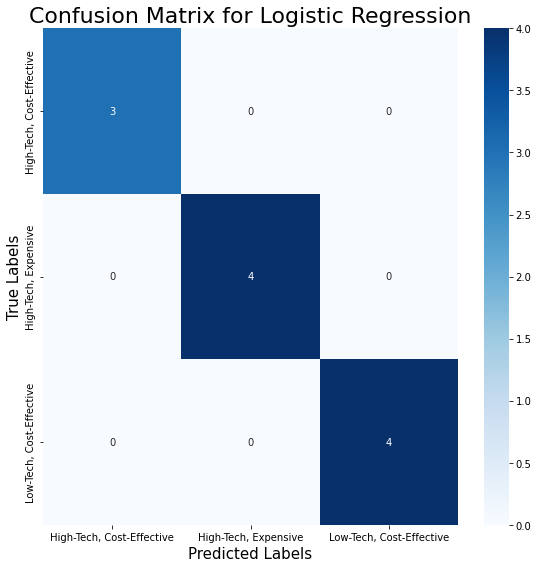

In [1169]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Step 9: Logistic Regression Model (already trained)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Step 10: Predictions
y_pred_log_reg = log_reg.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_log_reg)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

# Add labels, title and adjust the layout
plt.title('Confusion Matrix for Logistic Regression', fontsize=22)
plt.xlabel('Predicted Labels', fontsize= 15)
plt.ylabel('True Labels', fontsize= 15)
plt.tight_layout()

# Show the plot
plt.show()



## ***2. DECISION TREE CLASSIFIER***

In [1217]:
# Initialize Decision Tree Classifier with regularization parameters
dec_tree = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,
    min_samples_split=8,
    min_samples_leaf=9,
    max_features='sqrt',
    ccp_alpha=0.06,
    class_weight='balanced'  # Automatically adjusts weights based on class frequencies
)


# Fit the model
dec_tree.fit(X_train, y_train)

# Predict the results
y_pred_dec_tree = dec_tree.predict(X_test)
y_pred_proba_dec = dec_tree.predict_proba(X_test)


# Decision Tree Classifier Evaluation
print("Decision Tree Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dec_tree)}")
print(f"Precision: {precision_score(y_test, y_pred_dec_tree, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_dec_tree, average='weighted')}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_dec, multi_class='ovr', average='weighted')}")

print(f"F1 Score: {f1_score(y_test, y_pred_dec_tree, average='weighted')}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred_dec_tree)}\n")


Decision Tree Evaluation:
Accuracy: 0.9090909090909091
Precision: 0.9272727272727272
Recall: 0.9090909090909091
ROC-AUC: 0.9512987012987014
F1 Score: 0.9050505050505051
Confusion Matrix: 
[[2 1 0]
 [0 4 0]
 [0 0 4]]



## ***3. Random Forest Classifer***

In [1171]:

rand_forest = RandomForestClassifier(
    random_state=42,
    max_depth=75,
    min_samples_split=4,
    min_samples_leaf=11,
    max_features='sqrt',
    ccp_alpha=0.01,
    class_weight='balanced'  # Automatically adjusts weights based on class frequencies
)

rand_forest.fit(X_train, y_train)
y_pred_rand_forest = rand_forest.predict(X_test)
y_pred_proba_rand_forest = rand_forest.predict_proba(X_test)



print("Random Forest Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rand_forest)}")
print(f"Precision: {precision_score(y_test, y_pred_rand_forest, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_rand_forest, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred_rand_forest, average='weighted')}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_dec, multi_class='ovr', average='weighted')}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred_rand_forest)}\n")



Random Forest Evaluation:
Accuracy: 0.8181818181818182
Precision: 0.8787878787878788
Recall: 0.8181818181818182
F1 Score: 0.7909090909090909
ROC-AUC: 0.9512987012987014
Confusion Matrix: 
[[1 2 0]
 [0 4 0]
 [0 0 4]]



## ***4. K-Learning***

In [1184]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)  # Generate predictions
y_pred_proba_knn_clf = knn_clf.predict_proba(X_test)


print("knn_clf:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_knn_clf, multi_class='ovr', average='weighted')}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n")


knn_clf:
Accuracy: 0.9090909090909091
Precision: 0.9318181818181818
Recall: 0.9090909090909091
F1 Score: 0.9090909090909091
ROC-AUC: 0.9375
Confusion Matrix: 
[[3 0 0]
 [1 3 0]
 [0 0 4]]



## Compare Models